# Computer Exersice 1

## Method 1

In [1]:
def print_sample(expts):
    print('Temperature\tE_Temp (X_(1,1), X_(2,2))\tE_Temp (X_(1,1), X_(8,8))\
     \n1\t\t{}\t\t\t\t{}\
     \n1.5\t\t{}\t\t\t\t{}\
     \n2\t\t{}\t\t\t\t{}'.format(expts[0,0], expts[0,1],
                                expts[1,0], expts[1,1],
                                expts[2,0], expts[2,1]))    

In [42]:
import numpy as np
import time

#start = time.time()

number_of_samples = 10000
numberOfSweeps =25

number_of_tempratures=3
n=8
temperatures = np.array([1, 1.5, 2])
expts = np.zeros((number_of_tempratures,2))

for tempNum,Temp in enumerate(temperatures[:number_of_tempratures]):
    for sampNum in range(1,number_of_samples+1): # Starting a sample
        A=np.empty((n+2,n+2))
        A[0,:]=np.zeros((1,n+2))
        A[n+1,:]=np.zeros((1,n+2))
        A[:,0]=np.zeros(n+2)
        A[:,n+1]=np.zeros(n+2)
        A[1:n+1,1:n+1]=np.random.randint(low=0,high=2,size=(n,n))*2-1
        
        
        #print(A)
        
        for stablz in np.arange(numberOfSweeps): # Stabializing loop
            for i in range(1,n+1):
                for j in range(1,n+1):
                    neighboursSum = (A[i-1, j] + A[i+1, j] + A[i, j-1] + A[i, j+1])
                    #print("({}, {})".format(i,j))
                    #print("neighboursSum = {}".format(neighboursSum))
                    p1 = np.exp((1/Temp)*neighboursSum)
                    pM1 = np.exp(-(1/Temp)*neighboursSum)  # p of MINUS 1: p_{-1}
                    A[i,j] = np.random.choice(a=np.array([-1,1]), p=np.array(([pM1,p1]))/(p1+pM1))
        #print(A)
        expts[tempNum,0] = ((sampNum-1)*expts[tempNum,0] + (A[1,1]*A[2,2]))/sampNum
        expts[tempNum,1] = ((sampNum-1)*expts[tempNum,1] + (A[1,1]*A[8,8]))/sampNum
        
#end = time.time()
#print(end - start)

In [43]:
print_sample(expts)

Temperature	E_Temp (X_(1,1), X_(2,2))	E_Temp (X_(1,1), X_(8,8))     
1		0.9304000000000003				0.5387999999999994     
1.5		0.7529999999999962				0.3736000000000021     
2		0.487				0.08259999999999994


## Method 2

In [38]:
import numpy as np
#import time

#start = time.time()
burn_in_period = 100
#burn_in_period = 100
number_of_samples_over_all = 25000
#number_of_samples_over_all = 1000

number_of_samples = number_of_samples_over_all - burn_in_period

number_of_tempratures=3
n=8
temperatures = np.array([1, 1.5, 2])
expts = np.zeros((number_of_tempratures,2))

A=np.empty((n+2,n+2))
A[0,:]=np.zeros((1,n+2))
A[n+1,:]=np.zeros((1,n+2))
A[:,0]=np.zeros(n+2)
A[:,n+1]=np.zeros(n+2)
A[1:n+1,1:n+1]=np.random.randint(low=0,high=2,size=(n,n))*2-1

for tempNum,Temp in enumerate(temperatures[:number_of_tempratures]):
    for stablz in np.arange(burn_in_period): # Stabializing loop
        for i in range(1,n+1):
            for j in range(1,n+1):
                neighboursSum = (A[i-1, j] + A[i+1, j] + A[i, j-1] + A[i, j+1])
                p1 = np.exp((1/Temp)*neighboursSum)
                pM1 = np.exp(-(1/Temp)*neighboursSum)  # p of MINUS 1: p_{-1}
                A[i,j] = np.random.choice(a=np.array([-1,1]), p=np.array(([pM1,p1]))/(p1+pM1))
    
    for sampNum in range(1,number_of_samples+1):
        for i in range(1,n+1):
            for j in range(1,n+1):
                neighboursSum = (A[i-1, j] + A[i+1, j] + A[i, j-1] + A[i, j+1])
                p1 = np.exp((1/Temp)*neighboursSum)
                pM1 = np.exp(-(1/Temp)*neighboursSum)  # p of MINUS 1: p_{-1}
                A[i,j] = np.random.choice(a=np.array([-1,1]), p=np.array(([pM1,p1]))/(p1+pM1))
        
        expts[tempNum,0] = ((sampNum-1)*expts[tempNum,0] + (A[1,1]*A[2,2]))/sampNum
        expts[tempNum,1] = ((sampNum-1)*expts[tempNum,1] + (A[1,1]*A[8,8]))/sampNum

#end = time.time()
#print(end - start)

289.71717262268066


In [40]:
print_sample(expts)

Temperature	E_Temp (X_(1,1), X_(2,2))	E_Temp (X_(1,1), X_(8,8))     
1		0.9510843373493973				0.9034538152610447     
1.5		0.762730923694777				0.5544578313253036     
2		0.5028915662650619				0.12128514056224934


## Computer Exercise 2

### Sub-exercise (a)

In [8]:
import numpy as np

number_of_samples = 100


number_of_tempratures=3
n=100
temperatures = np.array([1, 1.5, 2])
from matplotlib import pyplot as plt
plt.show()
number_of_tempratures=3
temperatures = np.array([1, 1.5, 2])
imgs_arr=np.empty((3,5,n,n))
sigma = 2

In [13]:
import numpy as np

#n=100
#n=10

number_of_sweeps = 50
#number_of_sweeps = 50

number_of_tempratures=3
temperatures = np.array([1, 1.5, 2])

A=np.empty((number_of_tempratures,n+2,n+2))
A[:,0,:]=np.zeros((number_of_tempratures,n+2))
A[:,n+1,:]=np.zeros((number_of_tempratures,n+2))
A[:,:,0]=np.zeros((number_of_tempratures,n+2))
A[:,:,n+1]=np.zeros((number_of_tempratures,n+2))
A[:,1:n+1,1:n+1]=np.random.randint(low=0,high=2,size=(number_of_tempratures,n,n))*2-1

for tempNum,Temp in enumerate(temperatures[:number_of_tempratures]):
    for stablz in np.arange(number_of_sweeps): # Stabializing loop
        for i in range(1,n+1):
            for j in range(1,n+1):
                neighboursSum = (A[tempNum,i-1, j] + A[tempNum,i+1, j]
                                 + A[tempNum,i, j-1] + A[tempNum,i, j+1])
                p1 = np.exp((1/Temp)*neighboursSum)
                pM1 = np.exp(-(1/Temp)*neighboursSum)  # p of MINUS 1: p_{-1}
                A[tempNum,i,j] = np.random.choice(a=np.array([-1,1]), p=np.array(([pM1,p1]))/(p1+pM1))
    
    imgs_arr[0,0]=A[0,1:-1,1:-1]
    imgs_arr[1,0]=A[1,1:-1,1:-1]
    imgs_arr[2,0]=A[2,1:-1,1:-1]

In [7]:
A=np.arange(18).reshape(6,3)
A[0]

array([0, 1, 2])

### Sub-exercise (b)

In [15]:
for tempNum,Temp in enumerate(temperatures[:number_of_tempratures]):
    eta = sigma*np.random.standard_normal(size=(n,n))
    A[tempNum,1:n+1,1:n+1] = A[tempNum,1:n+1,1:n+1] + eta


imgs_arr[0,1]=A[0,1:-1,1:-1]
imgs_arr[1,1]=A[1,1:-1,1:-1]
imgs_arr[2,1]=A[2,1:-1,1:-1]

### Sub-exercise (c)

In [18]:
number_of_sweeps=50
#number_of_sweeps = number_of_sweeps

C = np.copy (A)

for tempNum,Temp in enumerate(temperatures[:number_of_tempratures]):
    for sweepNum in range(1,number_of_sweeps+1):
        for i in range(1,n+1):
            for j in range(1,n+1):
                neighboursSum = (C[tempNum,i-1, j] + C[tempNum,i+1, j] + C[tempNum,i, j-1] + C[tempNum,i, j+1])
                p1 = np.exp((1/Temp)*neighboursSum - ((1/(2*(sigma**2)))*((C[tempNum,i,j]-1)**2)))
                pM1 = np.exp((-1/Temp)*neighboursSum - ((1/(2*(sigma**2)))*((C[tempNum,i,j]+1)**2)))
                # p of MINUS 1: p_{-1}
                C[tempNum,i,j] = np.random.choice(a=np.array([-1,1]), p=np.array(([pM1,p1]))/(p1+pM1))

imgs_arr[0,2]=C[0,1:-1,1:-1]
imgs_arr[1,2]=C[1,1:-1,1:-1]
imgs_arr[2,2]=C[2,1:-1,1:-1]

### Sub-exercise (d): ICM

In [26]:
import numpy as np

number_of_tempratures=3

n=100
max_number_of_sweeps = 10000

D=np.empty((number_of_tempratures,n+2,n+2))
D[:,0,:]=np.zeros((number_of_tempratures,n+2))
D[:,n+1,:]=np.zeros((number_of_tempratures,n+2))
D[:,:,0]=np.zeros((number_of_tempratures,n+2))
D[:,:,n+1]=np.zeros((number_of_tempratures,n+2))
D[:,1:n+1,1:n+1]=np.random.randint(low=0,high=2,size=(number_of_tempratures,n,n))*2-1



#= np.copy (A)

for tempNum,Temp in enumerate(temperatures[:number_of_tempratures]):
    for sweep in np.arange(max_number_of_sweeps):
        D_prev = np.copy (D[tempNum,:,:])
        for i in range(1,n+1):
            for j in range(1,n+1):
                neighboursSum = (D[tempNum,i-1, j] + D[tempNum,i+1, j]
                                 + D[tempNum,i, j-1] + D[tempNum,i, j+1])
                
                y_s=A[tempNum,i,j]
                p1 = np.exp((1/Temp)*neighboursSum-((1/(2*(sigma**2)))*((y_s-1)**2)))
                pM1 = np.exp(-(1/Temp)*neighboursSum-((1/(2*(sigma**2)))*((y_s+1)**2)))  # p of MINUS 1: p_{-1}
                if p1 > pM1:
                    D[tempNum,i,j] = 1
                else:
                    if p1 < pM1:
                        D[tempNum,i,j] = -1
                    else: # p1 = pM1
                        D[tempNum,i,j] = np.random.randint(low=0,high=2)*2-1
        if (np.array_equal(D_prev, D[tempNum,:,:])):
            print("CONVERGES in temperature: {} after {} iterations".format(Temp, sweep))
            break
    if (sweep==max_number_of_sweeps-1):
        print("does not converges in temperature {}".format(Temp))

imgs_arr[0,3]=D[0,1:-1,1:-1]
imgs_arr[1,3]=D[1,1:-1,1:-1]
imgs_arr[2,3]=D[2,1:-1,1:-1]

CONVERGES in temperature: 1.0 after 12 iterations
CONVERGES in temperature: 1.5 after 11 iterations
CONVERGES in temperature: 2.0 after 12 iterations


### Sub-exercise (e)

In [28]:
number_of_tempratures=3

n=n
sigma = sigma

# number_of_swipes
E = np.copy (A)

E[E<0]=-1
E[E>=0]=1


imgs_arr[0,4]=E[0,1:-1,1:-1]
imgs_arr[1,4]=E[1,1:-1,1:-1]
imgs_arr[2,4]=E[2,1:-1,1:-1]

### Store imgs_arr

### Sub-exercise (f)

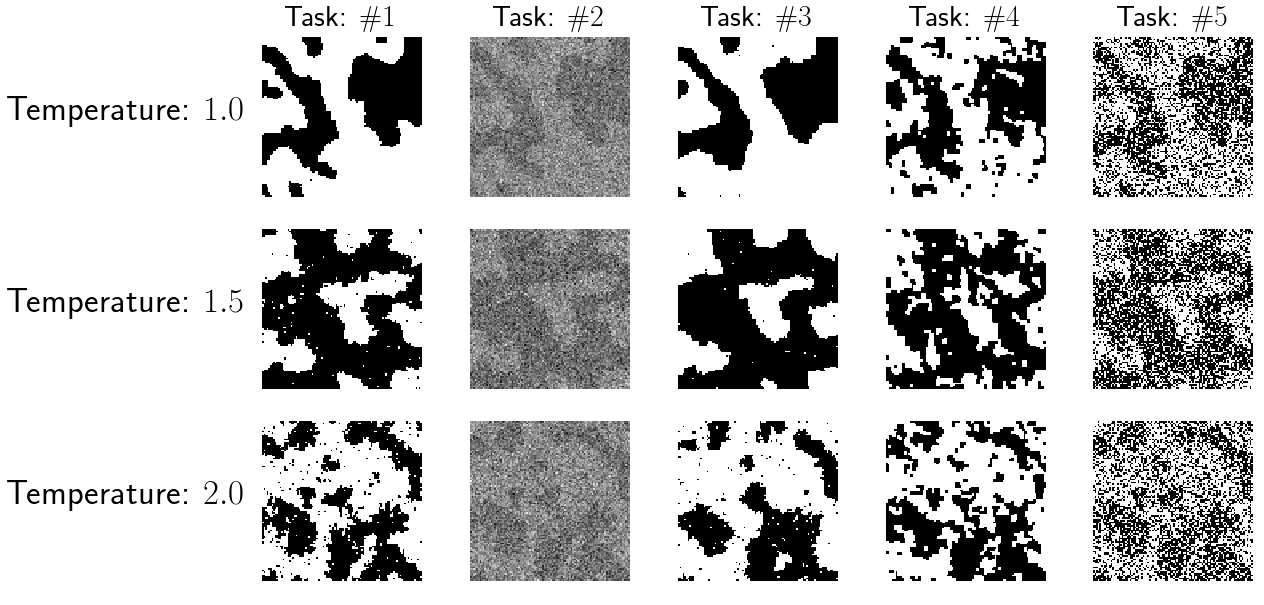

In [29]:
plt.figure(figsize=(18, 10))
for tempNum,Temp in enumerate(temperatures):
    for task in range(5):
        plt.subplot(number_of_tempratures,5,1+task+5*tempNum)
        if task != 1:
            plt.imshow(imgs_arr[tempNum,task], vmin=-1,vmax=1,cmap='gray')
            if task == 0:
                plt.text(-160,50,"Temperature: ${}$".format(Temp), fontsize=35,usetex=True)
        else:
            plt.imshow(imgs_arr[tempNum,task],cmap='gray')
        plt.axis('Off')
        if tempNum == 0:
            plt.text(14,-5,"Task: $\# {}$".format(task+1), fontsize=30,usetex=True)
plt.savefig('computerExercise2f.jpg',bbox_inches='tight')
plt.show()